<a href="https://colab.research.google.com/github/csataridominik/SouthKorea2025/blob/main/Ultrasound%20intensity%20filtering%20based%20on%20Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

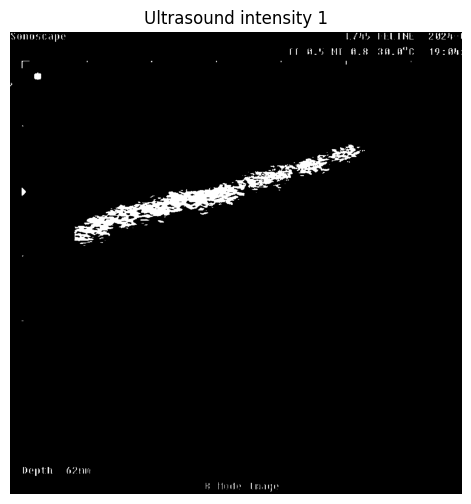

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_high_intensity(image_path, threshold=130):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create a binary mask where intensity is above the threshold
    _, mask = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

    # Create an output image with only high-intensity areas
    output = np.zeros_like(image)
    output[mask > 0] = 255  # Set high-intensity regions to white

    return output

#histogram pixelintenzitás alapján
#quartile, hogy 20-30%-a legyen kiszedve a top intenzitásból

# Example usage
image_paths = ["ultrahang_screen (1).png"]  # Update paths if necessary

for i, img_path in enumerate(image_paths):
    result = extract_high_intensity(img_path)

    # Display the processed image
    plt.figure(figsize=(6,6))
    plt.imshow(result, cmap="gray")
    plt.axis("off")
    plt.title(f"Ultrasound intensity {i+1}")
    plt.show()

    # Save the processed image
    cv2.imwrite(f"processed_{i+1}.png", result)

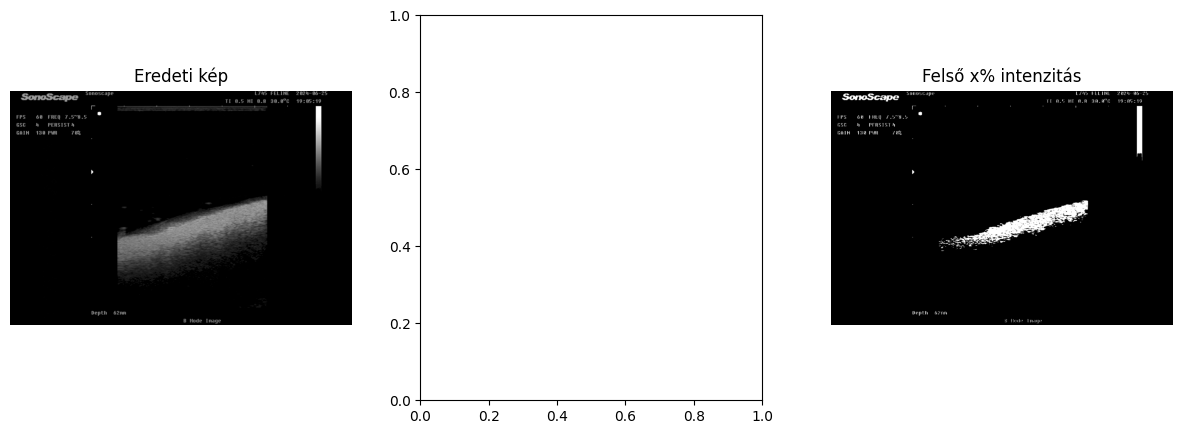

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_top_x_percent(image_path):
    # Kép betöltése szürkeárnyalatosként
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Hisztogram számítása
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])

    # Kumulatív eloszlás számítása
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]  # Normalizált kumulatív eloszlás

    # Küszöbérték meghatározása a felső 20%-hoz
    threshold_value = np.where(cdf_normalized >= 0.97)[0][0]

    # Maszk létrehozása: csak azok a pixelek maradnak, amelyek a felső 20%-ba esnek
    mask = image >= threshold_value
    output = np.zeros_like(image)
    output[mask] = 255  # A magas intenzitású pixelek fehérek lesznek, a többi fekete

    return image, hist, bins, output, threshold_value

# Futtatás
image_path = "ultrahang_screen3.png"  # Cseréld ki a saját fájlodra
original, hist, bins, processed, threshold = extract_top_20_percent(image_path)

# Ábrázolás
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Eredeti kép
axs[0].imshow(original, cmap="gray")
axs[0].axis("off")
axs[0].set_title("Eredeti kép")



# Hisztogram
#axs[1].plot(bins[:-1], hist, color="black")
#axs[1].axvline(threshold, color="red", linestyle="dashed", label=f"Küszöb: {threshold}")
#axs[1].set_title("Pixelek intenzitáshisztogramja")
#axs[1].set_xlabel("Intenzitás")
#axs[1].set_ylabel("Pixelek száma")
#axs[1].legend()

# Feldolgozott kép
axs[2].imshow(processed, cmap="gray")
axs[2].axis("off")
axs[2].set_title("Felső x% intenzitás")

plt.show()


HISZTOGRAM ALAPJÁN

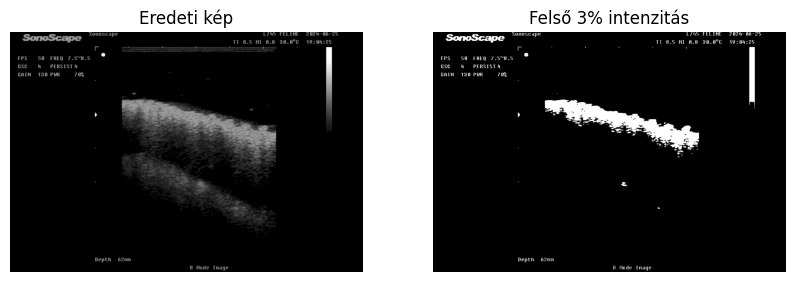

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_top_x_percent(image_path):
    # Kép betöltése szürkeárnyalatosként
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Hisztogram számítása
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])

    # Kumulatív eloszlás számítása
    cdf = hist.cumsum()
    #print(cdf)
    cdf_normalized = cdf / cdf[-1]  # Normalizált kumulatív eloszlás
    #print(cdf_normalized)

    # Küszöbérték meghatározása a felső 3-4%-hoz
    threshold_value = np.where(cdf_normalized >= 0.96)[0][0]

    # Maszk létrehozása: csak azok a pixelek maradnak, amelyek a felső 20%-ba esnek
    mask = image >= threshold_value
    output = np.zeros_like(image)
    output[mask] = 255  # A magas intenzitású pixelek fehérek lesznek, a többi fekete

    return image, output, threshold_value

# Futtatás
image_path = "ultrahang_screen2.png"  # Cseréld ki a saját fájlodra
#image_path = "ultrasound4.png"
original, processed, threshold = extract_top_x_percent(image_path)

# Ábrázolás
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Eredeti kép
axs[0].imshow(original, cmap="gray")
axs[0].axis("off")
axs[0].set_title("Eredeti kép")

# Feldolgozott kép
axs[1].imshow(processed, cmap="gray")
axs[1].axis("off")
axs[1].set_title("Felső 3% intenzitás")

plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np



main_img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)  # Load main image in grayscale
kernel = main_img[61:79,25:43].copy()

# Apply template matching
result = cv2.matchTemplate(main_img, kernel, cv2.TM_CCOEFF_NORMED)

# Get the best match location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw a rectangle around the detected template
h, w = kernel.shape  # Get dimensions of the template
top_left = max_loc  # Best match location
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(main_img, top_left, bottom_right, (255, 255, 255), 2)  # Draw rectangle

# Show the result
cv2.imshow("Detected Shape", main_img)
cv2.waitKey(0)
cv2.destroyAllWindows()





TypeError: 'NoneType' object is not subscriptable

In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import Colab-specific function

def find_left_up(main_img):
  # Load main image in grayscale


  # Define the template (kernel) from the main image
  #kernel = main_img[61:79, 25:43].copy()

  kernel = cv2.imread("kernel.png", cv2.IMREAD_GRAYSCALE)
  # Apply template matching
  result = cv2.matchTemplate(main_img, kernel, cv2.TM_CCOEFF_NORMED)

  # Get the best match location
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

  return max_loc
  # Draw a rectangle around the detected template
  # h, w = kernel.shape  # Get dimensions of the template
  # top_left = max_loc  # Best match location
  # bottom_right = (top_left[0] + w, top_left[1] + h)

  # cv2.rectangle(main_img, top_left, bottom_right, (255, 255, 255), 2)  # Draw rectangle

  # Display image in Colab (use cv2_imshow instead of cv2.imshow)
  #cv2_imshow(main_img)

  # Save the modified main image
  #cv2.imwrite("output.png", main_img)


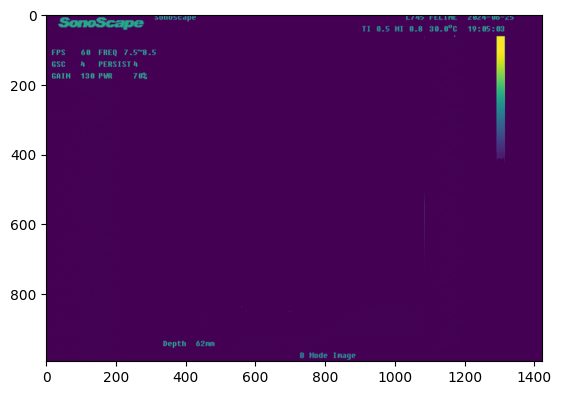

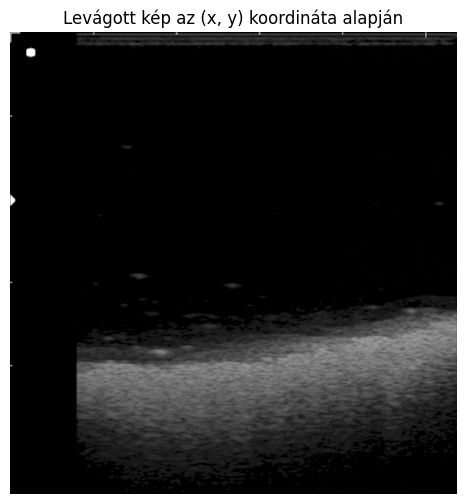

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "ultrasound4.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
x,y = find_left_up(image)

x2 = x+775 - 25
y2 = y+836- 60

# Levágjuk a képet az (x, y) koordináta szerint
cropped_image = image[y:y2, x:x2].copy()  # A képet az (x, y) ponttól lefelé és jobbra vágjuk
image[y:y2, x:x2] = 0
plt.imshow(image)


# Mentés
cropped_image_path = "cropped_image.png"
cv2.imwrite(cropped_image_path, cropped_image)

# Megjelenítés Matplotlib segítségével
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Levágott kép az (x, y) koordináta alapján")
plt.show()


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import Colab-specific function

# Load main image in grayscale
main_img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

# Define the template (kernel) from the main image
kernel = main_img[61:79, 25:43].copy()  # Ensure the kernel is defined

# Save the kernel as an image
cv2.imwrite("kernel.png", kernel)

# Apply template matching
result = cv2.matchTemplate(main_img, kernel, cv2.TM_CCOEFF_NORMED)

# Get the best match location
_, max_val, _, top_left = cv2.minMaxLoc(result)

# Get dimensions of the template
h, w = kernel.shape

# Compute bottom-right coordinates for cropping
bottom_right = (top_left[0] + w, top_left[1] + h)

# Crop the detected region from the main image
cropped_img = main_img[top_left[1:], top_left[0:]]

# Display cropped image in Colab
cv2_imshow(cropped_img)

# Save the cropped image
cv2.imwrite("cropped_output.png", cropped_img)


True